<a href="https://colab.research.google.com/github/tkn13/datasci_project/blob/dev%2Fmodeling/anta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Loading**

In [47]:
import pandas as pd
import os
from google.colab import drive

def get_connection():
    if not os.path.exists('/content/drive'):
        drive.mount('/content/drive')

    base_path = '/content/drive/MyDrive/datamine_shared/'
    return base_path

def load_data(version='v1'):
    base = get_connection()

    file_map = {
        'v1': 'data_clean_v1.csv',
    }

    path = os.path.join(base, file_map[version])
    print(f"Loading {file_map[version]}...")
    return pd.read_csv(path)

In [48]:
!git clone https://github.com/tkn13/datasci_project
%cd datasci_project

Cloning into 'datasci_project'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 33 (delta 10), reused 5 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 15.95 KiB | 7.98 MiB/s, done.
Resolving deltas: 100% (10/10), done.
/content/datasci_project/datasci_project/datasci_project


In [49]:
import utils

utils.get_connection()

'/content/drive/My Drive/datamine_shared/'

In [50]:
df = utils.load_data()

Loading data_clean_v1.csv...


In [51]:
df.head()

,ID,Old,Driving_experience,Distribution_channel,Policies_in_force,Max_policies,Max_products,Lapse,Payment,Cost_claims_year,...,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight,Has_lapsed,Years_with_company,Premium
0,3,40,20,0,1,2,1,0,0,0.0,...,85,1229,16030.0,5,0,3.999,1105,0,1,380.20
1,3,41,21,0,1,2,1,0,0,0.0,...,85,1229,16030.0,5,0,3.999,1105,0,2,393.50
2,3,42,22,0,1,2,1,0,0,0.0,...,85,1229,16030.0,5,0,3.999,1105,0,3,393.50
3,3,43,23,0,1,2,1,0,0,0.0,...,85,1229,16030.0,5,0,3.999,1105,0,4,395.47
4,6,49,25,0,1,2,2,0,0,0.0,...,87,1598,9927.0,4,0,4.250,1055,0,1,250.52


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46016 entries, 0 to 46015
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       46016 non-null  int64  
 1   Old                      46016 non-null  int64  
 2   Driving_experience       46016 non-null  int64  
 3   Distribution_channel     46016 non-null  int64  
 4   Policies_in_force        46016 non-null  int64  
 5   Max_policies             46016 non-null  int64  
 6   Max_products             46016 non-null  int64  
 7   Lapse                    46016 non-null  int64  
 8   Payment                  46016 non-null  int64  
 9   Cost_claims_year         46016 non-null  float64
 10  N_claims_year            46016 non-null  int64  
 11  N_claims_history         46016 non-null  int64  
 12  R_Claims_history         46016 non-null  float64
 13  Area                     46016 non-null  int64  
 14  Second_driver         

In [53]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def evaluate(name, y_test, pred, baseline, y):

    residual = y_test - pred

    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mae  = mean_absolute_error(y_test, pred)

    baseline_mae = mean_absolute_error(y_test, baseline)

    return {
        "Method": name,

        # main metrics
        "R2": r2_score(y_test, pred),
        "RMSE": rmse,
        "MAE": mae,

        # compare with baseline
        "Improvement_MAE_%": (baseline_mae - mae) / baseline_mae * 100,

        # relative to scale
        "MAE_over_mean": mae / y.mean(),
        "RMSE_over_mean": rmse / y.mean(),

        # residual
        "Residual_mean": residual.mean(),
        "Residual_std": residual.std(),
        "Residual": list(residual)      # เก็บค่าทุกตัว
    }


In [54]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Premium', 'ID'])
y = df['Premium']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Train size:", len(X_train))
print("Test size :", len(X_test))

Train size: 36812
Test size : 9204


In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_raw = X_train[num_features + cat_features].values
raw_names = num_features + cat_features

vif_before = compute_vif_from_array(X_raw, raw_names)

print("===== VIF BEFORE SCALING =====")
print(vif_before)

===== VIF BEFORE SCALING =====
                    feature         VIF
14                   Length  189.948378
15                   Weight  142.379696
0                       Old   71.436800
11        Cylinder_capacity   63.784077
13                  N_doors   31.038596
10                    Power   29.395561
1        Driving_experience   26.891635
12            Value_vehicle   23.194707
4              Max_products   20.793928
3              Max_policies   12.735028
2         Policies_in_force   10.616152
9   Length_of_vehicle_usage    7.506282
16       Years_with_company    6.236249
22                Type_fuel    3.407224
7          N_claims_history    2.484606
23               Has_lapsed    2.418666
8          R_Claims_history    2.289264
17     Distribution_channel    2.071314
18                    Lapse    2.017212
6             N_claims_year    1.912582
19                  Payment    1.601960
20                     Area    1.508740
21            Second_driver    1.252221
5        

# **Baseline mean**

In [55]:
baseline_value = y_train.mean()

baseline_pred = np.full_like(y_test, baseline_value)

result = []

result.append(
    evaluate(
        name="Baseline_mean",
        y_test=y_test,
        pred=baseline_pred,
        baseline=baseline_pred,   # baseline เทียบกับตัวเอง
        y=y
    )
)

In [56]:
pd.DataFrame(result).drop(columns=["Residual"])

,Method,R2,RMSE,MAE,Improvement_MAE_%,MAE_over_mean,RMSE_over_mean,Residual_mean,Residual_std
0,Baseline_mean,-0.000036,135.34743,92.54196,0.0,0.277645,0.406071,-0.808233,135.35237


In [57]:
baseline_value

np.float64(333.4718108225578)

# **Linear**

In [58]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

pred = model_linear.predict(X_test)

result.append(
    evaluate(
        name="Linear",
        y_test=y_test,
        pred=pred,
        baseline=baseline_pred,
        y=y
    )
)

In [59]:
pd.DataFrame(result).drop(columns=["Residual"])

,Method,R2,RMSE,MAE,Improvement_MAE_%,MAE_over_mean,RMSE_over_mean,Residual_mean,Residual_std
0,Baseline_mean,-0.000036,135.347430,92.541960,0.000000,0.277645,0.406071,-0.808233,135.352370
1,Linear,0.276435,115.128018,79.455049,14.141597,0.238382,0.345408,-1.393990,115.125833


In [60]:
coef = pd.DataFrame({
    "feature": X_train.columns,
    "coef": model_linear.coef_
}).assign(abs_coef=lambda d: d["coef"].abs()) \
  .sort_values("abs_coef", ascending=False) \
  .drop(columns=["abs_coef"])

coef

,feature,coef
13,Second_driver,51.453174
7,Payment,42.733455
22,Has_lapsed,17.812658
6,Lapse,13.659778
11,R_Claims_history,13.309500
23,Years_with_company,12.117063
12,Area,11.677060
20,Length,-10.389554
2,Distribution_channel,8.789202
3,Policies_in_force,-7.660972


In [61]:
model_linear.intercept_

np.float64(325.855644043392)

In [62]:
print("Skew of original Premium:", y.skew())

Skew of original Premium: 2.93705677087486


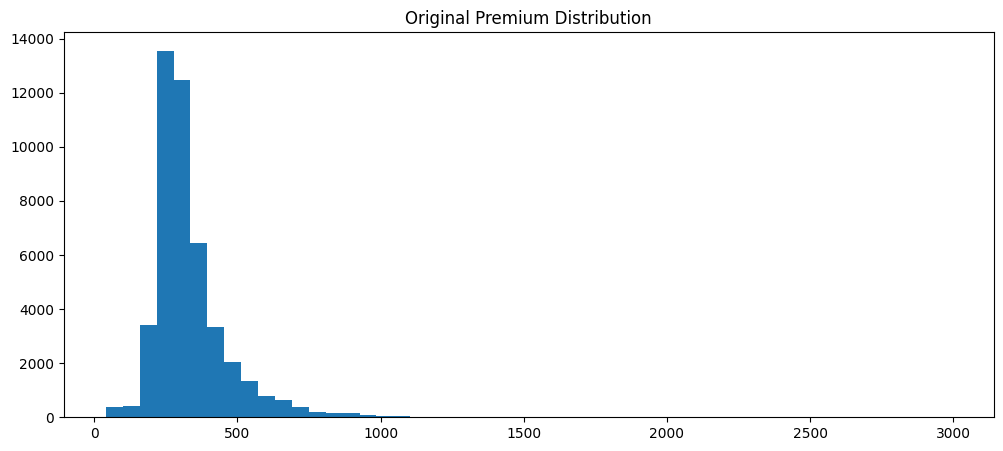

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.hist(y, bins=50)
plt.title("Original Premium Distribution")

plt.show()

# **Log(y) + Linear**

In [64]:
y_train_log = np.log(y_train)
y_test_log  = np.log(y_test)

model_log_linear = LinearRegression()
model_log_linear.fit(X_train, y_train_log)

pred_log = model_log_linear.predict(X_test)

pred = np.exp(pred_log)

result.append(
    evaluate(
        name="Log(y) + Linear",
        y_test=y_test,
        pred=pred,
        baseline=baseline_pred,
        y=y
    )
)

In [65]:
pd.DataFrame(result).drop(columns=["Residual"])

,Method,R2,RMSE,MAE,Improvement_MAE_%,MAE_over_mean,RMSE_over_mean,Residual_mean,Residual_std
0,Baseline_mean,-0.000036,135.347430,92.541960,0.000000,0.277645,0.406071,-0.808233,135.352370
1,Linear,0.276435,115.128018,79.455049,14.141597,0.238382,0.345408,-1.393990,115.125833
2,Log(y) + Linear,0.238371,118.117444,75.756774,18.137920,0.227286,0.354377,14.560218,117.222965


In [66]:
coef = pd.DataFrame({
    "feature": X_train.columns,
    "coef": model_log_linear.coef_
}).assign(abs_coef=lambda d: d["coef"].abs()) \
  .sort_values("abs_coef", ascending=False) \
  .drop(columns=["abs_coef"])

coef

,feature,coef
13,Second_driver,0.143933
7,Payment,0.138871
22,Has_lapsed,0.050246
23,Years_with_company,0.042125
3,Policies_in_force,-0.039434
6,Lapse,0.038866
12,Area,0.029542
11,R_Claims_history,0.029423
2,Distribution_channel,0.026033
20,Length,-0.019261


In [67]:
model_log_linear.intercept_

np.float64(5.6547287875282155)

In [68]:
print("Skew of log(Premium):", np.log(y).skew())

Skew of log(Premium): 0.09735015537868177


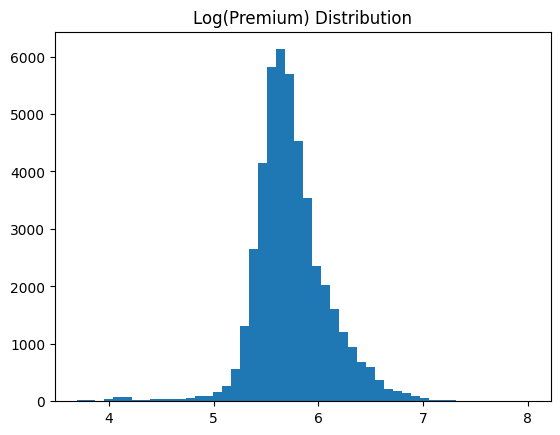

In [69]:
plt.hist(np.log(y), bins=50)
plt.title("Log(Premium) Distribution")

plt.show()

# **Normalization + comparation**

*   Linear Regression: baseline, ความสัมพันธ์เชิงเส้นระหว่างปัจจัยกับเบี้ย, ทนต่อ normalization ปรับ coef ชดเชยอัตโนมัติ
*   Ridge Regression: แก้ปัญหา multicollinearity, มักทำนายดีกว่า Linear ธรรมดาเมื่อ feature สัมพันธ์กัน, ไม่ทนต่อ normalization (ถ้า feature สเกลใหญ่ → coef เล็ก สเกลเล็ก → coef ใหญ่)
*   Lasso Regression: ให้ coef บางตัวเป็น 0 → เลือกตัวแปรอัตโนมัติ, ไม่ทนต่อ normalization (ถ้า feature สเกลใหญ่ → coef เล็ก สเกลเล็ก → coef ใหญ่)
*   ElasticNet: ข้อดีของ Ridge + Lasso, เสถียรกว่า Lasso เมื่อ feature สัมพันธ์กันสูง, ไม่ทนต่อ normalization (ถ้า feature สเกลใหญ่ → coef เล็ก สเกลเล็ก → coef ใหญ่)
*   K-Nearest Neighbors (KNN): ทำนายจากค่าเฉลี่ยของลูกค้าที่คล้ายที่สุด, ไม่ทนต่อ normalization (ใช้ distance)
*   Random Forest: รวมต้นไม้หลายต้น, ทนต่อ outlier, ทนต่อ normalization ต้นไม้ตัดสินใจด้วยลำดับ ไม่ใช่ขนาด



In [70]:
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor


# 1) Sigmoid Scaler
class SigmoidScaler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.mean_ = X.mean(axis=0)
        self.std_ = X.std(axis=0) + 1e-8

        # จำชื่อ feature ไว้
        if hasattr(X, "columns"):
            self.feature_names_ = X.columns
        else:
            self.feature_names_ = None

        return self

    def transform(self, X):
        z = (X - self.mean_) / self.std_
        return 1 / (1 + np.exp(-z))

    def get_feature_names_out(self, input_features=None):
        if input_features is not None:
            return np.array(input_features)
        return np.array(self.feature_names_)

# 2) ฟังก์ชัน VIF
def compute_vif_from_array(X, feature_names):
    vif = pd.DataFrame()
    vif["feature"] = feature_names
    vif["VIF"] = [
        variance_inflation_factor(X, i)
        for i in range(X.shape[1])
    ]
    return vif.sort_values("VIF", ascending=False)

scalers = {
    "MinMax": MinMaxScaler(),
    "Z-score": StandardScaler(),
    "Sigmoid": SigmoidScaler()
}

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01, max_iter=5000),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=5000),
    "KNN": KNeighborsRegressor(n_neighbors=15),
    "RF": RandomForestRegressor(n_estimators=200, random_state=42)
}

num_features = [
 'Old','Driving_experience','Policies_in_force','Max_policies',
 'Max_products','Cost_claims_year','N_claims_year','N_claims_history',
 'R_Claims_history','Length_of_vehicle_usage','Power',
 'Cylinder_capacity','Value_vehicle','N_doors','Length',
 'Weight','Years_with_company'
]

cat_features = [
 'Distribution_channel','Lapse','Payment','Area',
 'Second_driver','Type_fuel','Has_lapsed'
]

coef_store = {}      # เก็บ coef + intercept
vif_store = {}       # เก็บ vif

y_train_log = np.log(y_train)

for s_name, scaler in scalers.items():

    preprocess = ColumnTransformer([
        ("num", scaler, num_features),
        ("cat", "passthrough", cat_features)
    ])

    # ----- คำนวณ VIF บน train หลัง transform -----
    X_trans = preprocess.fit_transform(X_train)
    feature_names = preprocess.get_feature_names_out()

    try:
        vif_store[s_name] = compute_vif_from_array(
            X_trans, feature_names
        )
    except:
        vif_store[s_name] = "VIF not computable"

    # ----- loop model -----
    for m_name, model in models.items():

        pipe = Pipeline([
            ("prep", preprocess),
            ("model", model)
        ])

        pipe.fit(X_train, y_train_log)

        pred_log = pipe.predict(X_test)
        pred = np.exp(pred_log)

        # ----- เก็บ result -----
        result.append(
            evaluate(
                f"{s_name} + log(y) + {m_name}",
                y_test,
                pred,
                baseline_pred,
                y
            )
        )

        # ----- เก็บ coef/intercept เฉพาะโมเดลเชิงเส้น -----
        if m_name in ["Linear", "Ridge", "Lasso", "ElasticNet"]:

            coefs = pipe.named_steps["model"].coef_
            intercept = pipe.named_steps["model"].intercept_

            coef_store[f"{s_name}_{m_name}"] = {
                "intercept": intercept,

                "coef_df": pd.DataFrame({
                    "feature": feature_names,
                    "coef": coefs,
                    "abs_coef": np.abs(coefs)
                }).sort_values("abs_coef", ascending=False)
            }

In [71]:
df_result = pd.DataFrame(result).drop(columns=["Residual"])
df_result

,Method,R2,RMSE,MAE,Improvement_MAE_%,MAE_over_mean,RMSE_over_mean,Residual_mean,Residual_std
0,Baseline_mean,-0.000036,135.347430,92.541960,0.000000,0.277645,0.406071,-0.808233,135.352370
1,Linear,0.276435,115.128018,79.455049,14.141597,0.238382,0.345408,-1.393990,115.125833
2,Log(y) + Linear,0.238371,118.117444,75.756774,18.137920,0.227286,0.354377,14.560218,117.222965
3,MinMax + log(y) + Linear,0.238371,118.117444,75.756774,18.137920,0.227286,0.354377,14.560218,117.222965
4,MinMax + log(y) + Ridge,0.243536,117.716238,75.731076,18.165688,0.227209,0.353173,14.678931,116.803784
5,MinMax + log(y) + Lasso,0.027193,133.492104,84.030822,9.197059,0.252110,0.400504,20.356992,131.937963
6,MinMax + log(y) + ElasticNet,0.097307,128.591511,80.537808,12.971578,0.241630,0.385801,19.622360,127.092465
7,MinMax + log(y) + KNN,0.142345,125.342571,79.054022,14.574943,0.237179,0.376054,20.605725,123.643946
8,MinMax + log(y) + RF,0.551680,90.622597,54.939956,40.632383,0.164831,0.271887,11.298095,89.920446
9,Z-score + log(y) + Linear,0.238371,118.117444,75.756774,18.137920,0.227286,0.354377,14.560218,117.222965


Sigmoid + log(y) + RF
* R² =  0.554235 -> โมเดลอธิบายความต่างของเบี้ยได้ ~55%
* RMSE = 90.363987 -> ยังสูงกว่า MAE พอสมควร ยังมีบางเคสที่ทายพลาดแรงอยู่
* MAE = 54.777337	-> โดยเฉลี่ยโมเดลพลาด ~55 บาทต่อกรมธรรม์ ( Premium เฉลี่ย 333.4718108225578 บาท )
* Improvement_MAE_% = 40.808108 -> การใช้โมเดลนี้ลดความพลาดได้ ~40% เทียบกับการทายค่าเฉลี่ย
*	MAE_over_mean = 0.164343 -> พลาดเฉลี่ย ~16% ของราคาเบี้ย
* RMSE_over_mean = 0.271111	-> สูงกว่า MAE_over_mean
⇒ มีลูกค้าบางกลุ่มที่โมเดลทายผิดมากกว่าค่าเฉลี่ย
* Residual_mean = 11.290637	-> ค่าเป็นบวก → โมเดลมีแนวโน้ม underprice โดยเฉลี่ยทายต่ำไป ~11 บาท/คน เสี่ยงขาดทุนเล็กน้อย
* Residual_std = 89.660722


R² – Coefficient of Determination: โมเดลอธิบายความแปรปรวนของ Premium ได้กี่ส่วน
* R²: < 0	แย่กว่าการทายค่าเฉลี่ย
* R²: 0 – 0.2	อธิบายได้น้อยมาก
* R²: 0.2 – 0.4	ระดับพอใช้สำหรับข้อมูลพฤติกรรม
* R²: 0.4 – 0.6	ดี
* R² > 0.6	ดีมาก (พบยาก)
* R² สูงไม่ได้แปลว่า pricing ดี โมเดลอาจมี R² สูงแต่พลาดหนักกับบางกลุ่ม

MAE – Mean Absolute Error: โดยเฉลี่ยโมเดลพลาดกี่บาทต่อกรมธรรม์ ( Premium เฉลี่ย 333.4718108225578 บาท ), ไม่ไวต่อ outlier
* MAE < 40	ดีมาก
* MAE: 40–60	ดี
* MAE: 60–80	พอใช้
* MAE: > 80	ยังไม่เหมาะใช้จริง

RMSE – Root Mean Squared Error
* ไม่มี outlier:	RMSE ≈ MAE
* มี outlier มาก:	RMSE >> MAE

Improvement_MAE_%
* ค่า < 0	แย่กว่า baseline
* ค่า 0–10%	ดีขึ้นเล็กน้อย
* ค่า 10–20%	ดีขึ้นชัด
* ค่า > 20%	ดีมาก

MAE_over_mean: บอกความพลาดเป็นสัดส่วนของราคา
* ค่า < 0.15	ดีมาก
* ค่า 0.15–0.25	พอใช้
* ค่า > 0.25	ยังสูง

RMSE_over_mean: ความเสี่ยงจากเคสที่ทายผิดมาก
* ค่า < 0.20	เสถียรดีมาก
* 0.20 – 0.30	ยอมรับได้
* 0.30 – 0.40	ยังมีความเสี่ยง
* ค่า > 0.40	โมเดลไม่เสถียร

Residual_mean
* ค่า ≈ 0	ไม่ bias
* ค่า > 0	underprice (เก็บเบี้ยน้อยไป)
* ค่า < 0	overprice (เก็บเกิน)

Residual_std: บอกความผันผวนของการทายผิด
* ต่ำ	pricing เสถียร
* สูง	บางกลุ่มทายพลาดมาก


In [73]:
for key, value in coef_store.items():

    print("\n========================================")
    print(f"Model: {key}")

    print("Intercept (log scale):", value["intercept"])

    print("\nAll coefficients:")
    print(value["coef_df"])


Model: MinMax_Linear
Intercept (log scale): 5.594553328438453

All coefficients:
                         feature      coef  abs_coef
12            num__Value_vehicle  2.656808  2.656808
5          num__Cost_claims_year  1.036499  1.036499
9   num__Length_of_vehicle_usage -0.924739  0.924739
8          num__R_Claims_history  0.685551  0.685551
2         num__Policies_in_force -0.630948  0.630948
11        num__Cylinder_capacity -0.464284  0.464284
7          num__N_claims_history  0.461586  0.461586
15                   num__Weight  0.192506  0.192506
3              num__Max_policies -0.177645  0.177645
21            cat__Second_driver  0.143933  0.143933
10                    num__Power  0.139096  0.139096
19                  cat__Payment  0.138871  0.138871
16       num__Years_with_company  0.126374  0.126374
14                   num__Length -0.069283  0.069283
0                       num__Old -0.053497  0.053497
23               cat__Has_lapsed  0.050246  0.050246
1        num__Dri

In [78]:
print("\n\n===== VIF AFTER SCALING =====")

for s_name, vif_df in vif_store.items():
    print("\n---------------------------")
    print("Scaler:", s_name)

    if isinstance(vif_df, str):
        print(vif_df)
    else:
        print(vif_df)



===== VIF AFTER SCALING =====

---------------------------
Scaler: MinMax
                         feature        VIF
14                   num__Length  79.194321
15                   num__Weight  78.617368
11        num__Cylinder_capacity  38.429326
0                       num__Old  32.665086
1        num__Driving_experience  27.852269
12            num__Value_vehicle  22.959887
10                    num__Power  22.482851
13                  num__N_doors   9.825353
9   num__Length_of_vehicle_usage   7.095082
3              num__Max_policies   5.343366
2         num__Policies_in_force   3.668586
22                cat__Type_fuel   3.402294
7          num__N_claims_history   2.483974
23               cat__Has_lapsed   2.415252
8          num__R_Claims_history   2.289294
17     cat__Distribution_channel   2.056937
18                    cat__Lapse   2.018139
16       num__Years_with_company   1.992510
6             num__N_claims_year   1.912594
19                  cat__Payment   1.599180


Variance Inflation Factor (VIF): check ปัญหา multicollinearity
* VIF	< 5	ดี
* VIF 5–10	เริ่ม multicollinearity
* VIF > 10	มีปัญหาแรง